# Disability Progression in Multiple Sclerosis from EDSS Scores
This tutorial notebook demonstrates the usage of some key functions in this repository.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
sns.set_style("whitegrid", {"grid_color": "gainsboro"})

from definitions import edssprogression
from tools import visualization

In [2]:
# This refreshes any modules upon change
%load_ext autoreload
%autoreload 2

## Input data format
* Data have to be provided as a Pandas dataframe, e.g. by importing an .xlsx or .csv file. 
* The data must have at least:
    * One column for the EDSS score
    * One column for the timestamp
* Relapses must be provided as a list of relapse timestamps.

### Important
* The timestamp must be provided as integer or float, e.g. as the numbers of days or weeks after baseline.
* The data have to be ordered in time from first to last assessment.
* The timestamps must be unique, i.e. there mustn't be two assessments with the same timestamp.

## Single follow-up example

### Example data

In [3]:
example_follow_up_df = pd.DataFrame(
    [
        {"days_after_baseline": 0, "edss_score": 5.0},
        {"days_after_baseline": 10, "edss_score": 4.5},
        {"days_after_baseline": 20, "edss_score": 4.5},
        {"days_after_baseline": 30, "edss_score": 5.0},
        {"days_after_baseline": 40, "edss_score": 4.5},
        {"days_after_baseline": 50, "edss_score": 4.0},
        {"days_after_baseline": 60, "edss_score": 3.5},
        {"days_after_baseline": 70, "edss_score": 5.5},
        {"days_after_baseline": 80, "edss_score": 5.5},
        {"days_after_baseline": 90, "edss_score": 4.5},
    ]
)
example_relapse_timestamps = []

### Instantiate annotation class

In [4]:
Annot = edssprogression.EDSSProgression(
    opt_baseline_type="roving",
    opt_roving_reference_require_confirmation=True,
    opt_roving_reference_confirmation_time=0.5,  # next-confirmed
    # PIRA/RAW options - ignored if no relapses specified
    opt_raw_before_relapse_max_days=5,
    opt_raw_after_relapse_max_days=10,
    # Minimum increase options
    opt_max_score_that_requires_plus_1=5.0,
    # Confirmation options
    opt_require_confirmation=True,
    opt_confirmation_time=0.5, # next-confirmed
)

### Get the annotated events

In [8]:
Annot.add_progression_events_to_follow_up(
    follow_up_dataframe=example_follow_up_df,
    relapse_timestamps=example_relapse_timestamps,
)

,days_after_baseline,edss_score,days_since_previous_relapse,days_to_next_relapse,is_post_event_rebaseline,is_general_rebaseline,is_raw_pira_rebaseline,edss_score_used_as_new_general_reference,edss_score_used_as_new_raw_pira_reference,is_progression,progression_type,progression_score,progression_reference_score,progression_event_id,is_post_relapse_rebaseline
0,0,5.0,NaN,NaN,False,False,False,NaN,NaN,False,None,NaN,NaN,NaN,False
1,10,4.5,NaN,NaN,False,True,True,4.5,4.5,False,None,NaN,NaN,NaN,False
2,20,4.5,NaN,NaN,False,False,False,NaN,NaN,False,None,NaN,NaN,NaN,False
3,30,5.0,NaN,NaN,False,False,False,NaN,NaN,False,None,NaN,NaN,NaN,False
4,40,4.5,NaN,NaN,False,False,False,NaN,NaN,False,None,NaN,NaN,NaN,False
5,50,4.0,NaN,NaN,False,True,True,4.0,4.0,False,None,NaN,NaN,NaN,False
6,60,3.5,NaN,NaN,False,False,False,NaN,NaN,False,None,NaN,NaN,NaN,False
7,70,5.5,NaN,NaN,True,True,True,5.5,5.5,True,PIRA,5.5,4.0,1.0,False
8,80,5.5,NaN,NaN,False,False,False,NaN,NaN,False,None,NaN,NaN,NaN,False
9,90,4.5,NaN,NaN,False,False,False,NaN,NaN,False,None,NaN,NaN,NaN,False


### Plot the follow-up with the annotated events

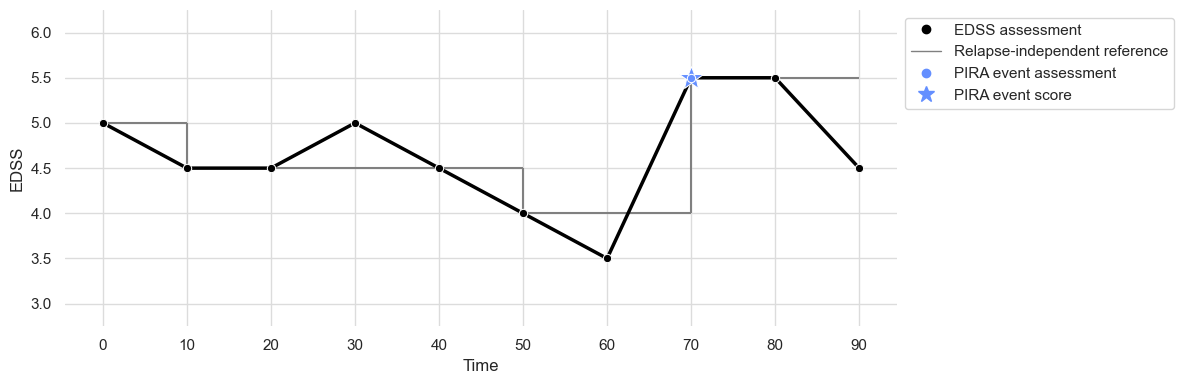

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
visualization.annotate_plot_follow_up(
    follow_up_dataframe=example_follow_up_df,
    relapse_timestamps=example_relapse_timestamps,
    # Options
    opt_baseline_type="roving",
    opt_roving_reference_require_confirmation=True,
    opt_roving_reference_confirmation_time=0.5,
    opt_raw_before_relapse_max_days=5,
    opt_raw_after_relapse_max_days=10,
    opt_max_score_that_requires_plus_1=5.0,
    opt_require_confirmation=True,
    opt_confirmation_time=0.5,
    ax=ax,
    )
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()

### Add a relapse

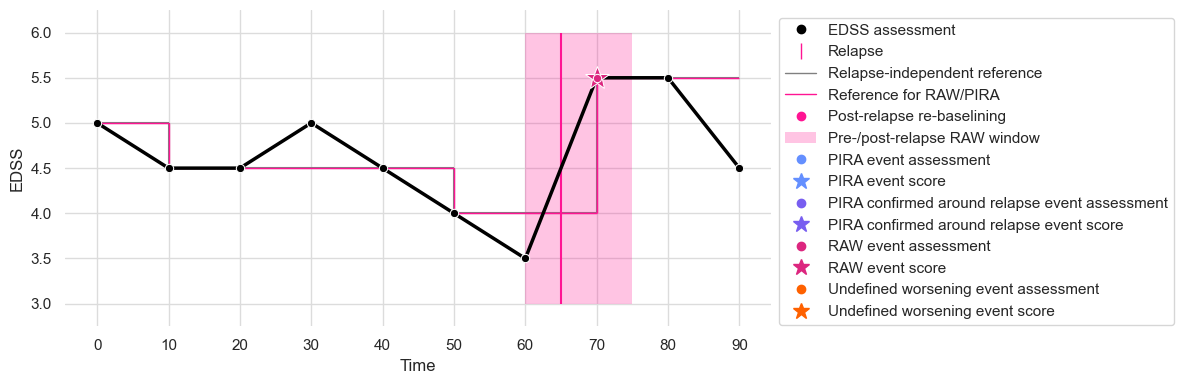

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
visualization.annotate_plot_follow_up(
    follow_up_dataframe=example_follow_up_df,
    relapse_timestamps=[65],
    # Options
    opt_baseline_type="roving",
    opt_roving_reference_require_confirmation=True,
    opt_roving_reference_confirmation_time=0.5,
    opt_raw_before_relapse_max_days=5,
    opt_raw_after_relapse_max_days=10,
    opt_max_score_that_requires_plus_1=5.0,
    opt_require_confirmation=True,
    opt_confirmation_time=0.5,
    ax=ax,
    )
fig.tight_layout()
sns.despine(bottom=True, left=True, right=True, top=True)
plt.show()